In [1]:
import yt
from yt import YTArray
from yt import YTQuantity

from astropy import constants as const

import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pylab as plt
from matplotlib.colors import SymLogNorm, LogNorm

import palettable
import plotting_tools as pt
import yt_functions as ytf


yt : [INFO     ] 2019-10-25 10:36:56,754 Parameters: current_time              = 0
yt : [INFO     ] 2019-10-25 10:36:56,756 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-25 10:36:56,757 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-25 10:36:56,758 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-25 10:36:56,758 Parameters: cosmological_simulation   = 0.0


In [2]:
from yt.funcs import just_one
xn, yn, zn = [('gas', "%s_%s" % ('magnetic_field', ax)) for ax in 'xyz']
print(xn, yn, zn)
div_fac = 2
sl_left = slice(None, -2, None)
sl_right = slice(2, None, None)
#sl_right = 1
#sl_left = -1
def _divB(field, data):
    
    ds = div_fac * just_one(data["index", "dx"])
    fdata = data[xn[0], 'relative_%s' % xn[1]]

    if fdata.shape[0] == 16384:
        fdata = fdata.reshape(128, 128)
    elif fdata.shape[0] == 2097152:
        fdata = fdata.reshape(128, 128, 128)

    f  = fdata[sl_right,1:-1,1:-1]/ds
    f -= fdata[sl_left ,1:-1,1:-1]/ds
    
    ds = div_fac * just_one(data["index", "dy"])
    fdata = data[yn[0], 'relative_%s' % yn[1]]
    if fdata.shape[0] == 16384:
        fdata = fdata.reshape(128, 128)
    elif fdata.shape[0] == 2097152:
        fdata = fdata.reshape(128, 128, 128)
    f += fdata[1:-1,sl_right,1:-1]/ds
    f -= fdata[1:-1,sl_left ,1:-1]/ds
    
    ds = div_fac * just_one(data["index", "dz"])
    fdata = data[zn[0], 'relative_%s' % zn[1]]
    if fdata.shape[0] == 16384:
        fdata = fdata.reshape(128, 128)
    elif fdata.shape[0] == 2097152:
        fdata = fdata.reshape(128, 128, 128)
    f += fdata[1:-1,1:-1,sl_right]/ds
    f -= fdata[1:-1,1:-1,sl_left ]/ds
    new_field = data.ds.arr(
        np.zeros(data[xn].shape, dtype=np.float64), f.units)
    
    if len(fdata) < 128:
        new_field[1:-1,1:-1,1:-1] = f
    else:
        new_field = YTArray(np.concatenate(f.in_units('G/kpc')), 'G/kpc')
    
    return new_field


def plot_divB(ds, vrange = 1e-4):
    ad = ds.all_data()
    x = ad[('gas', 'x')].in_units('kpc').reshape(128, 128, 128)
    y = ad[('gas', 'y')].in_units('kpc').reshape(128, 128, 128)
    z = ad[('gas', 'z')].in_units('kpc').reshape(128, 128, 128)
    bmag = ad[('gas', 'magnetic_field_strength')].in_units('G').reshape(128, 128, 128)
    divB = ad[('gas', 'divB')].in_units('G/kpc').reshape(126, 126, 126)
    data_x = np.zeros((126, 126))
    data_y = np.zeros((126, 126))
    data_z = np.zeros((126, 126))
    for i in range(126):
        data_x += divB[i, :, :] / 126 / bmag[i, 1:-1, 1:-1] 
        data_y += divB[:, i, :] / 126 / bmag[1:-1, i, 1:-1] 
        data_z += divB[:, :, i] / 126 / bmag[1:-1, 1:-1, i]


    fig, ax = plt.subplots(ncols = 3, figsize=(31, 10), sharex = True, sharey = True)
    pcm = ax[0].pcolormesh(y[0, 1:-1, 1:-1], z[0, 1:-1, 1:-1], data_x, cmap = 'coolwarm', \
                           norm = SymLogNorm(1e-1*vrange), vmin = -vrange, vmax = vrange)
   # fig.colorbar(pcm, pad = 0, ax = ax[0])
    
    pcm = ax[1].pcolormesh(x[1:-1, 0, 1:-1], z[1:-1, 0, 1:-1], data_y, cmap = 'coolwarm', \
                               norm = SymLogNorm(1e-1*vrange), vmin = -vrange, vmax = vrange)

  #  fig.colorbar(pcm, pad = 0, ax = ax[1])

    pcm = ax[2].pcolormesh(x[1:-1, 1:-1, 0], y[1:-1, 1:-1, 0], data_z, cmap = 'coolwarm', \
                                     norm = SymLogNorm(1e-1*vrange), vmin = -vrange, vmax = vrange)
    fig.colorbar(pcm, pad = 0, ax = ax[2])
    ax[0].set_xlabel('y (kpc)')
    ax[0].set_ylabel('z (kpc)')
    ax[1].set_xlabel('x (kpc)')
    ax[1].set_ylabel('z (kpc)')
    ax[2].set_xlabel('x (kpc)')
    ax[2].set_ylabel('y (kpc)')
    
    fig.tight_layout()

('gas', 'magnetic_field_x') ('gas', 'magnetic_field_y') ('gas', 'magnetic_field_z')


yt : [INFO     ] 2019-10-25 10:38:08,806 Parameters: current_time              = 0.59999706185795
yt : [INFO     ] 2019-10-25 10:38:08,807 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-25 10:38:08,808 Parameters: domain_left_edge          = [-2. -2. -2.]
yt : [INFO     ] 2019-10-25 10:38:08,809 Parameters: domain_right_edge         = [2. 2. 2.]
yt : [INFO     ] 2019-10-25 10:38:08,810 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-10-25 10:38:08,838 Gathering a field list (this may take a moment.)
/home/ibutsky/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  # Remove the CWD from sys.path while we load stuff.


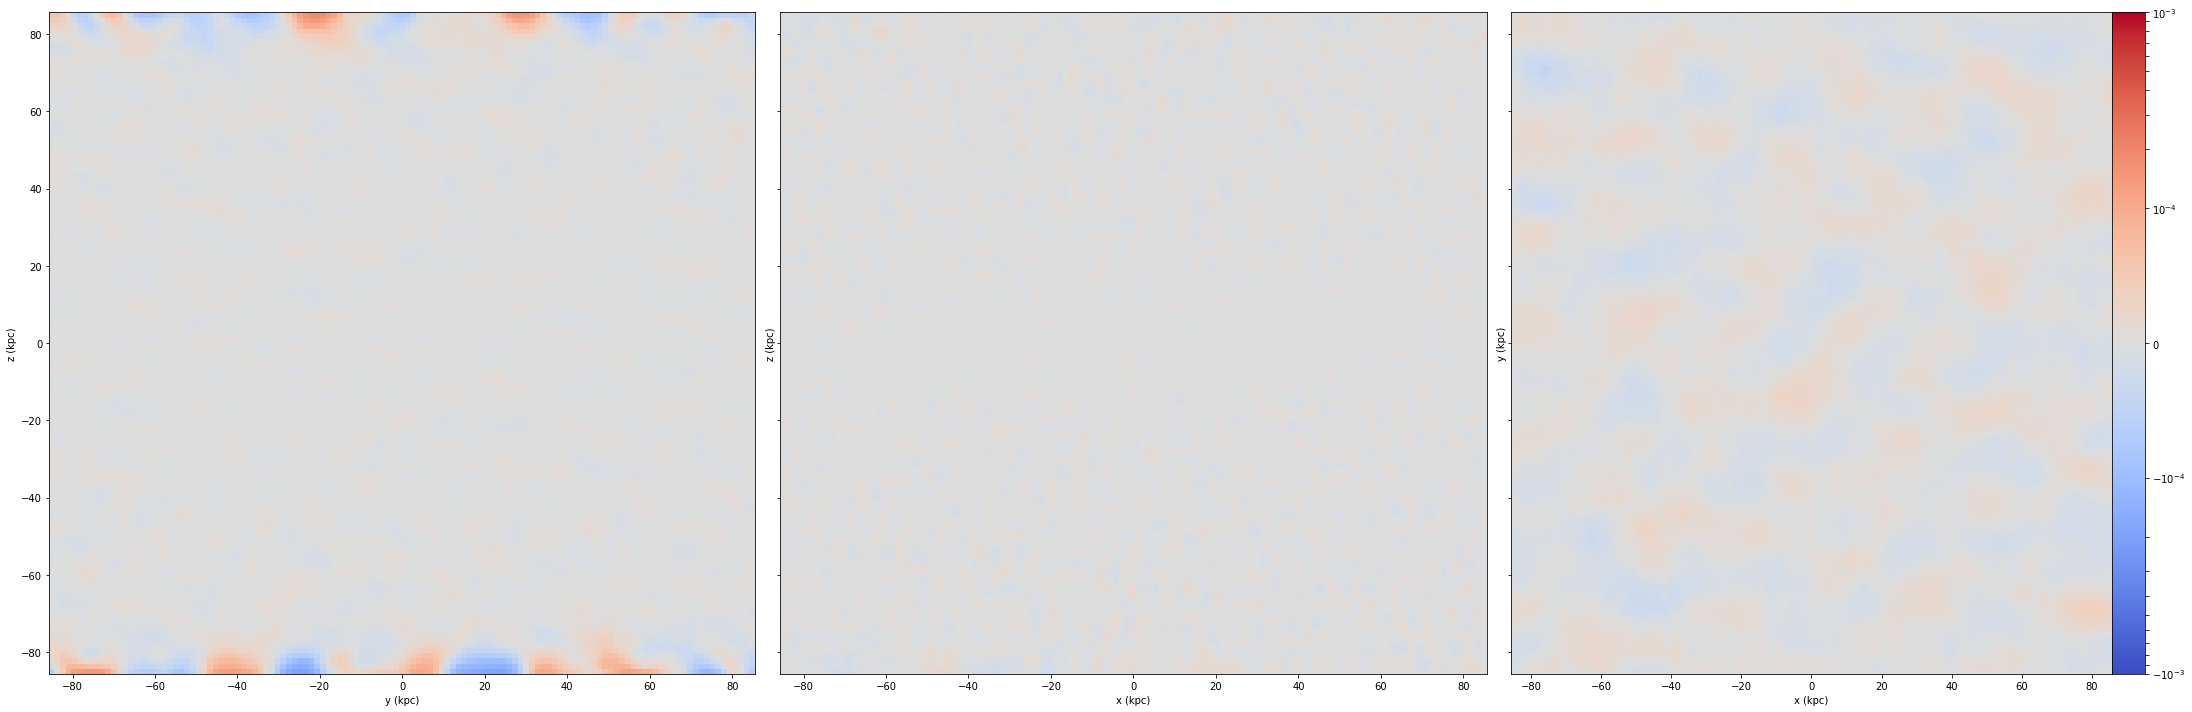

In [7]:
folder = 'isentropic_tctf_3.0_beta_4.0'
#folder = 'isothermal_tctf_10.0_beta_100.0'
#folder = 'isothermal_btest'
#folder = 'isentropic_btest'

#folder = 'btest_nograv_courant'

i = 2
ds = yt.load('../../simulations/%s/DD%04d/DD%04d'%(folder, i, i))
ds.add_field(('gas', 'divB'), function = _divB, units = 'G/kpc')
plot_divB(ds, vrange = 1e-3)

yt : [INFO     ] 2019-10-25 11:12:17,746 Parameters: current_time              = 0.49999990014399
yt : [INFO     ] 2019-10-25 11:12:17,748 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-25 11:12:17,749 Parameters: domain_left_edge          = [-2. -2. -2.]
yt : [INFO     ] 2019-10-25 11:12:17,750 Parameters: domain_right_edge         = [2. 2. 2.]
yt : [INFO     ] 2019-10-25 11:12:17,750 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-10-25 11:12:17,771 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2019-10-25 11:12:18,679 xlim = -2.000000 2.000000
yt : [INFO     ] 2019-10-25 11:12:18,680 ylim = -2.000000 2.000000
yt : [INFO     ] 2019-10-25 11:12:18,682 xlim = -2.000000 2.000000
yt : [INFO     ] 2019-10-25 11:12:18,682 ylim = -2.000000 2.000000
yt : [INFO     ] 2019-10-25 11:12:18,684 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



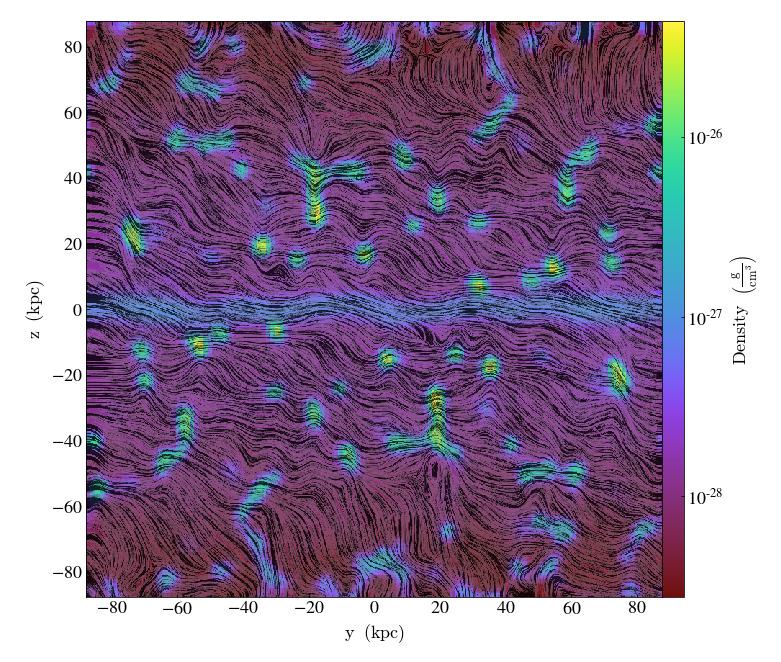

yt : [INFO     ] 2019-10-25 11:12:20,020 xlim = -2.000000 2.000000
yt : [INFO     ] 2019-10-25 11:12:20,021 ylim = -2.000000 2.000000
yt : [INFO     ] 2019-10-25 11:12:20,021 xlim = -2.000000 2.000000
yt : [INFO     ] 2019-10-25 11:12:20,022 ylim = -2.000000 2.000000
yt : [INFO     ] 2019-10-25 11:12:20,023 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



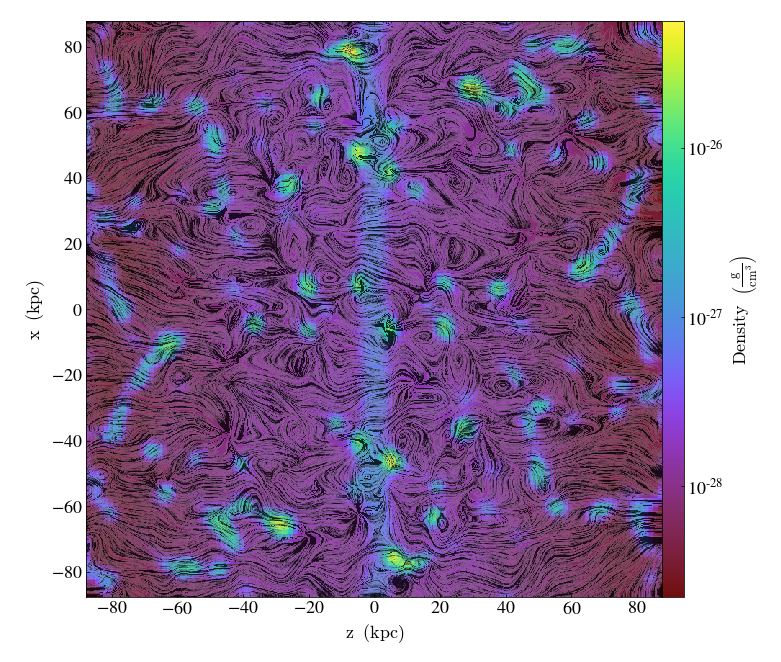

yt : [INFO     ] 2019-10-25 11:12:21,645 Projection completed
yt : [INFO     ] 2019-10-25 11:12:21,646 xlim = -2.000000 2.000000
yt : [INFO     ] 2019-10-25 11:12:21,647 ylim = -2.000000 2.000000
yt : [INFO     ] 2019-10-25 11:12:21,648 xlim = -2.000000 2.000000
yt : [INFO     ] 2019-10-25 11:12:21,648 ylim = -2.000000 2.000000
yt : [INFO     ] 2019-10-25 11:12:21,650 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2019-10-25 11:12:22,023 Projection completed
yt : [INFO     ] 2019-10-25 11:12:22,185 Projection completed



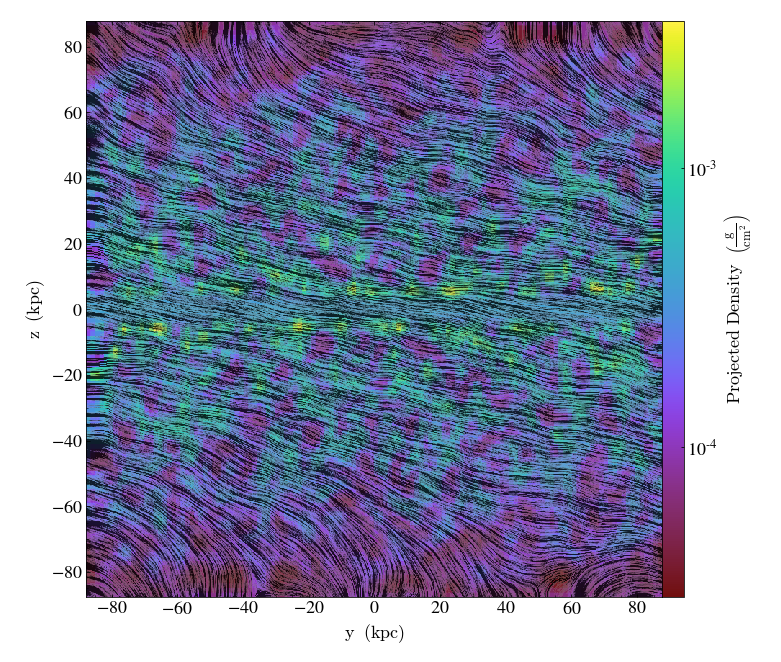

yt : [INFO     ] 2019-10-25 11:12:23,285 Projection completed
yt : [INFO     ] 2019-10-25 11:12:23,287 xlim = -2.000000 2.000000
yt : [INFO     ] 2019-10-25 11:12:23,288 ylim = -2.000000 2.000000
yt : [INFO     ] 2019-10-25 11:12:23,289 xlim = -2.000000 2.000000
yt : [INFO     ] 2019-10-25 11:12:23,290 ylim = -2.000000 2.000000
yt : [INFO     ] 2019-10-25 11:12:23,300 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2019-10-25 11:12:23,677 Projection completed
yt : [INFO     ] 2019-10-25 11:12:23,828 Projection completed



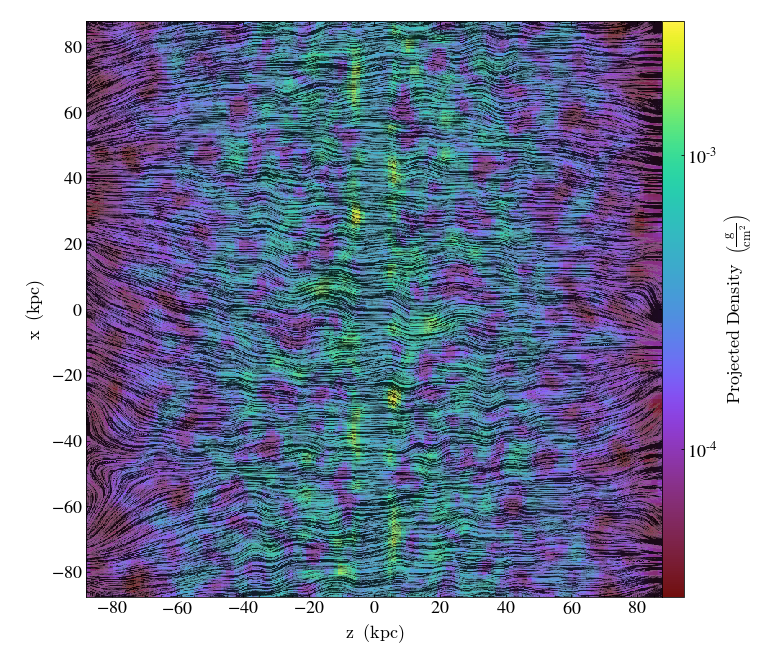

In [17]:
i = 50
folder = 'isentropic_tctf_0.1_beta_100.0'

ds = yt.load('../../simulations/%s/DD%04d/DD%04d'%(folder, i, i))
field = ('gas', 'density')
s = yt.SlicePlot(ds, 'x', field)
s.annotate_line_integral_convolution(('gas', 'magnetic_field_y'), ('gas', 'magnetic_field_z'), lim=(0.5, 0.65))
s.show()
s = yt.SlicePlot(ds, 'y', field)
s.annotate_line_integral_convolution(('gas', 'magnetic_field_z'), ('gas', 'magnetic_field_x'), lim=(0.5, 0.65))
s.show()

s = yt.ProjectionPlot(ds, 'x', field)
s.annotate_line_integral_convolution(('gas', 'magnetic_field_y'), ('gas', 'magnetic_field_z'), lim=(0.5, 0.65))
s.show()
s = yt.ProjectionPlot(ds, 'y', field)
s.annotate_line_integral_convolution(('gas', 'magnetic_field_z'), ('gas', 'magnetic_field_x'), lim=(0.5, 0.65))
s.show()

yt : [INFO     ] 2019-10-25 11:02:11,948 Parameters: current_time              = 0
yt : [INFO     ] 2019-10-25 11:02:11,949 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-25 11:02:11,950 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-25 11:02:11,951 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-25 11:02:11,952 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-10-25 11:02:11,960 Gathering a field list (this may take a moment.)


2.326525e+16 s
256.1040619182264 dimensionless


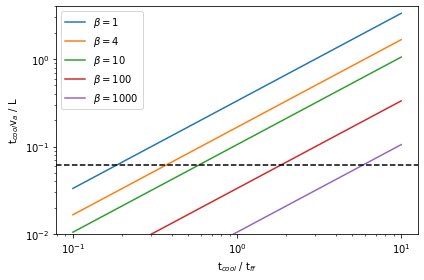

In [16]:
folder = 'isothermal_tctf_0.1_beta_100.0'
i = 0
ds = yt.load('../../simulations/%s/DD%04d/DD%04d'%(folder, i, i))
ad = ds.all_data()
p1 = ad[('gas', 'pressure')]
time_unit = ds.time_unit
print(time_unit)


tcool_av = ds.arr(6/16, 'code_length')
tcool = 3.0 * ds.time_unit
av = tcool_av / tcool

beta = 2 * p1 / ad[('gas','density')] / av**2
print(np.mean(beta))


for beta in [1, 4, 10, 100, 1000]:
    tctf_list = [0.1, 0.3, 1.0, 3, 10]
    tcool_av_list = []
    for tctf in tctf_list:
        tcool = tctf * time_unit
        av =  (np.sqrt(2* p1 / beta / ad[('gas', 'density')])).in_units('cm/s')
        tcool_av = (tcool * av).in_units('code_length') / 6
        tcool_av_list.append(np.mean(tcool_av))
    plt.loglog(tctf_list, tcool_av_list, label = '$\\beta = %i$'%beta)
    
plt.axhline(1/16, linestyle = 'dashed', color = 'black')
plt.xlabel('t$_{cool}$ / t$_{ff}$')
plt.ylabel('t$_{cool}$v$_a$ / L')
plt.ylim(1e-2, 4)
plt.legend()
plt.tight_layout()
plt.savefig('tcool_va_tctff.png', dpi = 300)

